In [ ]:
from google.colab import files
uploaded = files.upload()

Saving new_train.csv to new_train.csv


In [ ]:
import io
import pandas as pd
df1 = pd.read_csv(io.BytesIO(uploaded['new_train.csv']))

In [ ]:
df1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder

In [ ]:
print(tf.__version__)

2.15.0


In [ ]:
df1.isna().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [ ]:
## Looking at the data from columnwise record
df1.sample(10).T

,10067,7513,26302,28796,28880,14424,5091,17350,21009,30931
age,58,48,44,41,39,25,53,50,35,32
job,retired,management,admin.,blue-collar,admin.,services,retired,blue-collar,management,admin.
marital,married,married,single,married,married,single,married,married,single,single
education,high.school,university.degree,high.school,basic.9y,high.school,high.school,basic.4y,basic.4y,university.degree,university.degree
default,no,no,no,unknown,no,no,unknown,no,no,no
housing,yes,no,no,yes,yes,no,yes,yes,unknown,unknown
loan,no,no,no,no,no,no,no,no,unknown,unknown
contact,telephone,cellular,telephone,telephone,cellular,cellular,telephone,telephone,cellular,telephone
month,jun,oct,may,may,nov,may,may,may,may,jun
day_of_week,thu,wed,mon,wed,mon,thu,wed,fri,mon,fri


In [ ]:
df1['target'] = df1['y'].apply(lambda x: 1 if x== "yes" else 0)
df1.drop(['y'], axis=1, inplace = True)
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'target'],
      dtype='object')

In [ ]:
X = df1.drop('target', axis=1)
y = df1['target']

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X,
#                                                     y,
#                                                     test_size=0.2,
#                                                     random_state=42)
# print("The length of training dataset: ", len(X_train))
# print("The length of validation dataset: ", len(X_test))

In [ ]:
df1.dtypes

age             int64
job            object
marital        object
education      object
default        object
housing        object
loan           object
contact        object
month          object
day_of_week    object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
target          int64
dtype: object

In [ ]:
# def int_to_object_converter(df):
#   for column in df.columns:
#     df[column] = df[column].astype('object')
#     print(f"'{column}' not found in the data.")

#   return df


# df2 = int_to_object_converter(df1, col_conver_names)

In [ ]:
y.value_counts().to_frame().T

,0,1
target,29238,3712


In [ ]:
numerical_cols = X.select_dtypes(include='number').columns.tolist()
categorical_cols = X.select_dtypes(include='object').columns.tolist()

In [ ]:
scaler = StandardScaler()
df1[numerical_cols] = scaler.fit_transform(df1[numerical_cols])

# Preprocess categorical columns (one-hot encoding in this case)
label_encoder = LabelEncoder()
df1[categorical_cols] = df1[categorical_cols].apply(label_encoder.fit_transform)

# Split into features and target
X_numerical = df1[numerical_cols]
X_categorical = df1[categorical_cols]
y = df1['target']
X_numerical = X_numerical.astype(int)

In [ ]:
X_combined = pd.concat([X_numerical, X_categorical], axis=1)

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(
#     X_combined, y, test_size=0.2, random_state=42
# )

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_combined, y,
                                                  train_size=0.5,
                                                  test_size=0.2,
                                                  random_state=42,
                                                  shuffle=True)

In [ ]:
## Alternate ways of initializing the models.

from tensorflow import keras
from tensorflow.keras import layers

# Define a Sequential model
model = keras.Sequential()

# Add a Dense layer with 9 units, ReLU activation, and input shape based on the number of features in your data
model.add(layers.Dense(units=9, activation="relu", input_shape=(X_train.shape[-1],)))

# Add a Dropout layer to randomly drop 30% of the input units during training
model.add(layers.Dropout(0.3))

# Add another Dense layer with 9 units and ReLU activation
model.add(layers.Dense(units=9, activation="relu"))

# Add the output layer with a single neuron and sigmoid activation for binary classification
model.add(layers.Dense(units=1, activation="sigmoid"))

# Display the model summary to show the architecture
model.summary()

# Save the initial weights of the model for later use
initial_weights = model.get_weights()


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 9)                 144       
                                                                 
 dropout_6 (Dropout)         (None, 9)                 0         
                                                                 
 dense_19 (Dense)            (None, 9)                 90        
                                                                 
 dense_20 (Dense)            (None, 1)                 10        
                                                                 
Total params: 244 (976.00 Byte)
Trainable params: 244 (976.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
initial_weights

[array([[ 0.33317912, -0.19267917,  0.23467958, -0.34259093,  0.327484  ,
         -0.49087274,  0.200418  ,  0.16636562,  0.1221894 ],
        [-0.47246206, -0.40821314,  0.2786125 , -0.26735187,  0.25606513,
         -0.0254842 , -0.2857808 , -0.14742148, -0.17989814],
        [ 0.37477756,  0.44690263, -0.45397747,  0.27775443,  0.07662153,
         -0.10557854, -0.22745681, -0.03933477,  0.43969417],
        [-0.09288979, -0.12762415, -0.04246843, -0.22561622, -0.15155816,
          0.12759447, -0.39141238,  0.21284342,  0.44611788],
        [ 0.49802577,  0.22918415, -0.23257732,  0.31083894, -0.16876554,
         -0.48829377,  0.1282121 ,  0.07385588,  0.3911271 ],
        [-0.3192308 , -0.15837848, -0.09635544,  0.16315544, -0.45029426,
          0.27465248,  0.11317217,  0.13633168,  0.03595924],
        [-0.19316006,  0.13899481, -0.2250036 , -0.08611727, -0.11480272,
         -0.17361903,  0.28808367, -0.42217624,  0.47997117],
        [-0.08853674,  0.03455102,  0.24609852, 

In [ ]:
model = keras.Sequential(
    [
        keras.layers.Dense(units=9, activation="relu", input_shape=(X_train.shape[-1],) ),
        # randomly delete 30% of the input units below
        keras.layers.Dropout(0.3),
        keras.layers.Dense(units=9, activation="relu"),
        # the output layer, with a single neuron
        keras.layers.Dense(units=1, activation="sigmoid"),
    ]
)

# save the initial weights for later
initial_weights = model.get_weights()

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 9)                 144       
                                                                 
 dropout_4 (Dropout)         (None, 9)                 0         
                                                                 
 dense_13 (Dense)            (None, 9)                 90        
                                                                 
 dense_14 (Dense)            (None, 1)                 10        
                                                                 
Total params: 244 (976.00 Byte)
Trainable params: 244 (976.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


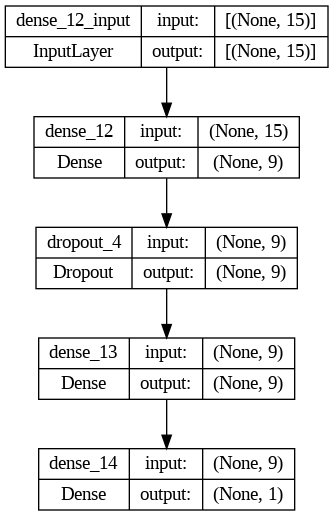

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
learning_rate = 0.001

model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
              loss="binary_crossentropy",
              metrics=keras.metrics.AUC()
             )

In [ ]:
history = model.fit(X_train, y_train,
          epochs=500,
          batch_size=1000,
          validation_data=(X_val, y_val),
          verbose=0)

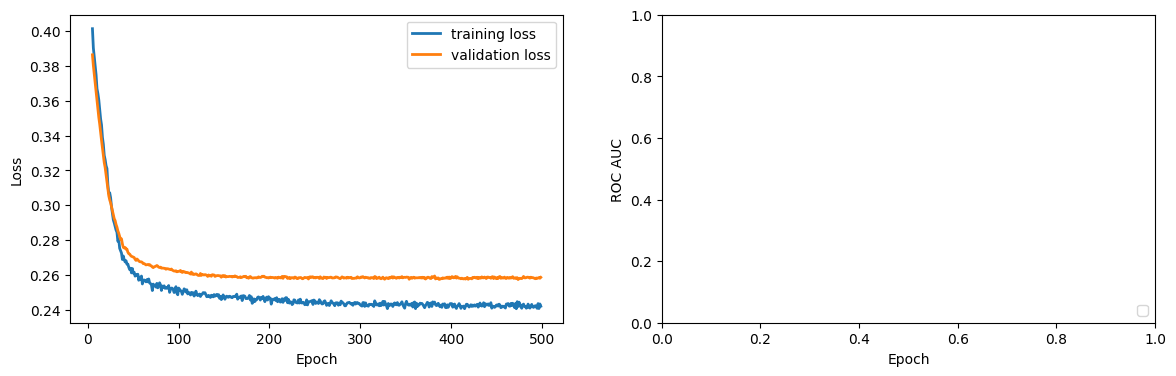

In [ ]:
logs = pd.DataFrame(history.history)

plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.plot(logs.loc[5:,"loss"], lw=2, label='training loss')
plt.plot(logs.loc[5:,"val_loss"], lw=2, label='validation loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.subplot(1, 2, 2)
# plt.plot(logs.loc[5:,"auc"], lw=2, label='training ROC AUC score')
# plt.plot(logs.loc[5:,"val_auc"], lw=2, label='validation ROC AUC score')
plt.xlabel("Epoch")
plt.ylabel("ROC AUC")
plt.legend(loc='lower right')
plt.show()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta = 0.0002, # minimium amount of change to count as an improvement
    patience  = 20,     # how many epochs to wait before stopping
    restore_best_weights=True,
)

In [ ]:
model.set_weights(initial_weights)

In [ ]:
history = model.fit(X_train, y_train,
          epochs=500,
          batch_size=1000,
          validation_data=(X_val, y_val),
          verbose=0,
          # add in our early stopping callback
          callbacks=[early_stopping]
        )

In [ ]:
# Evaluate the model on the test set
from sklearn.metrics import confusion_matrix, classification_report
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

# Predict on the test set
y_pred = (model.predict(X_test) > 0.4).astype('int32')

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
# Print classification report with label names
class_report = classification_report(y_test, y_pred, target_names=['No', 'Yes'])
print("\nClassification Report:")
print(class_report)

206/206 [==============================] - 1s 3ms/step - loss: 0.2606 - auc_4: 0.8613
Test Loss: 0.2606031000614166, Test Accuracy: 0.861304759979248
206/206 [==============================] - 1s 2ms/step
Confusion Matrix:
[[5534  264]
 [ 432  360]]

Classification Report:
              precision    recall  f1-score   support

          No       0.93      0.95      0.94      5798
         Yes       0.58      0.45      0.51       792

    accuracy                           0.89      6590
   macro avg       0.75      0.70      0.72      6590
weighted avg       0.89      0.89      0.89      6590



In [ ]:
from sklearn.metrics import precision_recall_curve, auc

# Get predicted probabilities for the positive class
y_prob = model.predict(X_test)

# Create an array of threshold values to try
thresholds = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

# Loop through threshold values
for threshold in thresholds:
    # Convert probabilities to binary predictions based on threshold
    y_pred = (y_prob > threshold).astype('int32')

    # Calculate precision, recall, and F1-score
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    f1_score = 2 * (precision * recall) / (precision + recall)

    # Print metrics for each threshold
    print(f"\nThreshold: {threshold}")
    print(f"Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print(f"Classification Report:")
    print(classification_report(y_test, y_pred, target_names=['No', 'Yes']))

    print(f"F1 Score: {max(f1_score)}")


206/206 [==============================] - 1s 2ms/step

Threshold: 0.2
Confusion Matrix:
[[5285  513]
 [ 304  488]]
Classification Report:
              precision    recall  f1-score   support

          No       0.95      0.91      0.93      5798
         Yes       0.49      0.62      0.54       792

    accuracy                           0.88      6590
   macro avg       0.72      0.76      0.74      6590
weighted avg       0.89      0.88      0.88      6590

F1 Score: 0.5561613958560524

Threshold: 0.3
Confusion Matrix:
[[5361  437]
 [ 331  461]]
Classification Report:
              precision    recall  f1-score   support

          No       0.94      0.92      0.93      5798
         Yes       0.51      0.58      0.55       792

    accuracy                           0.88      6590
   macro avg       0.73      0.75      0.74      6590
weighted avg       0.89      0.88      0.89      6590

F1 Score: 0.5561613958560524

Threshold: 0.4
Confusion Matrix:
[[5534  264]
 [ 432  360]]
Clas

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


206/206 [==============================] - 1s 4ms/step


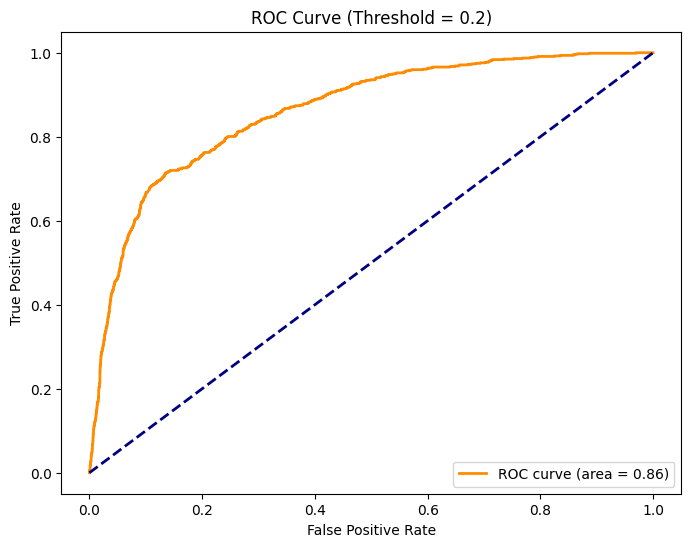


Threshold: 0.2
AUC-ROC Score: 0.8615653778209832
Confusion Matrix:
[[5285  513]
 [ 304  488]]
Classification Report:
              precision    recall  f1-score   support

          No       0.95      0.91      0.93      5798
         Yes       0.49      0.62      0.54       792

    accuracy                           0.88      6590
   macro avg       0.72      0.76      0.74      6590
weighted avg       0.89      0.88      0.88      6590



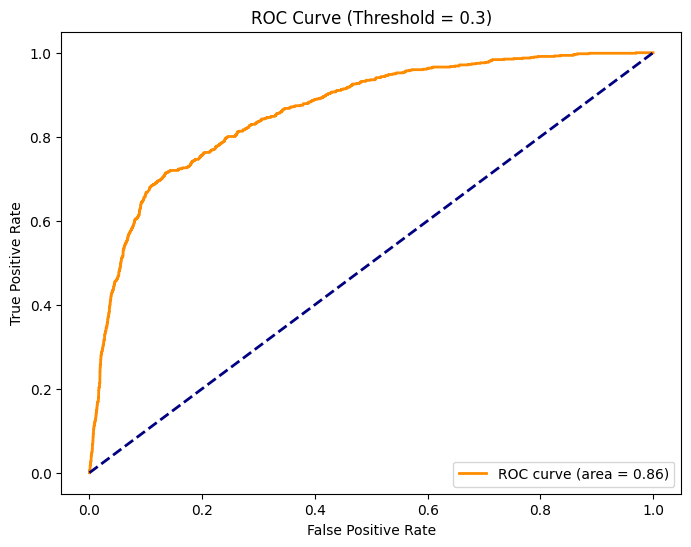


Threshold: 0.3
AUC-ROC Score: 0.8615653778209832
Confusion Matrix:
[[5361  437]
 [ 331  461]]
Classification Report:
              precision    recall  f1-score   support

          No       0.94      0.92      0.93      5798
         Yes       0.51      0.58      0.55       792

    accuracy                           0.88      6590
   macro avg       0.73      0.75      0.74      6590
weighted avg       0.89      0.88      0.89      6590



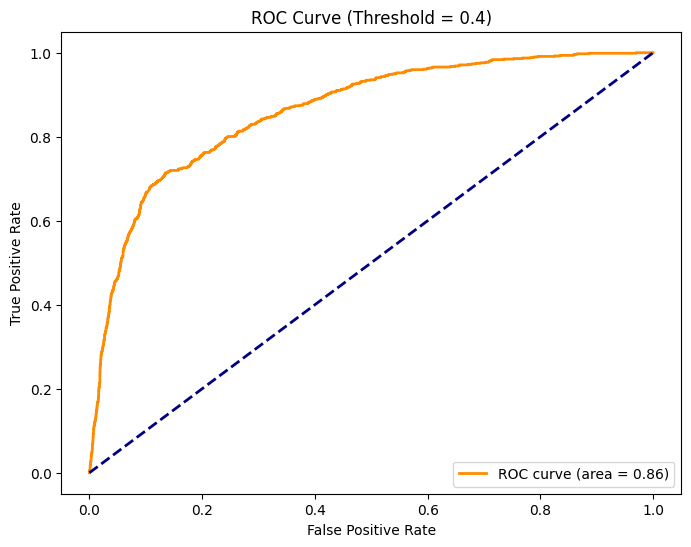


Threshold: 0.4
AUC-ROC Score: 0.8615653778209832
Confusion Matrix:
[[5534  264]
 [ 432  360]]
Classification Report:
              precision    recall  f1-score   support

          No       0.93      0.95      0.94      5798
         Yes       0.58      0.45      0.51       792

    accuracy                           0.89      6590
   macro avg       0.75      0.70      0.72      6590
weighted avg       0.89      0.89      0.89      6590



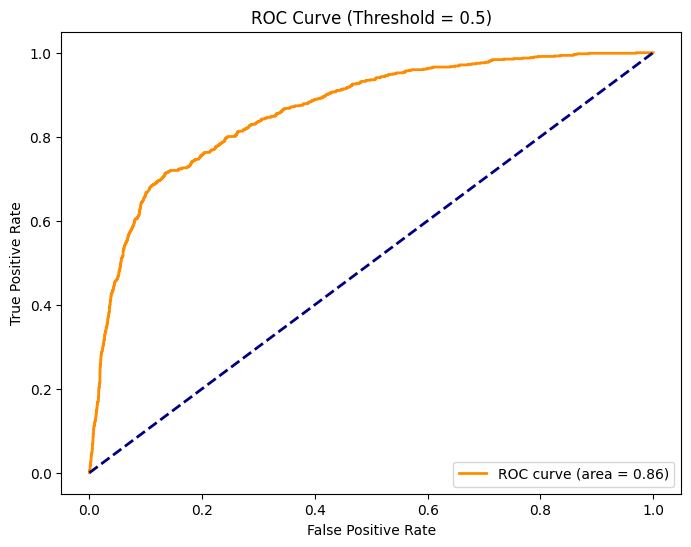


Threshold: 0.5
AUC-ROC Score: 0.8615653778209832
Confusion Matrix:
[[5670  128]
 [ 564  228]]
Classification Report:
              precision    recall  f1-score   support

          No       0.91      0.98      0.94      5798
         Yes       0.64      0.29      0.40       792

    accuracy                           0.89      6590
   macro avg       0.77      0.63      0.67      6590
weighted avg       0.88      0.89      0.88      6590



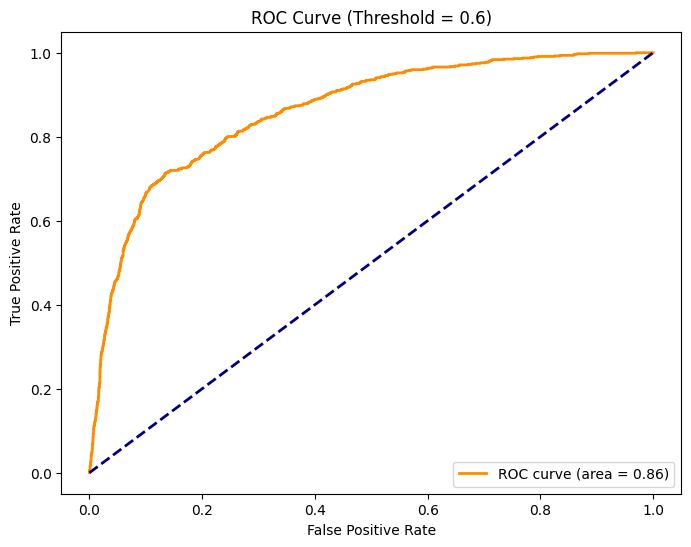


Threshold: 0.6
AUC-ROC Score: 0.8615653778209832
Confusion Matrix:
[[5744   54]
 [ 698   94]]
Classification Report:
              precision    recall  f1-score   support

          No       0.89      0.99      0.94      5798
         Yes       0.64      0.12      0.20       792

    accuracy                           0.89      6590
   macro avg       0.76      0.55      0.57      6590
weighted avg       0.86      0.89      0.85      6590



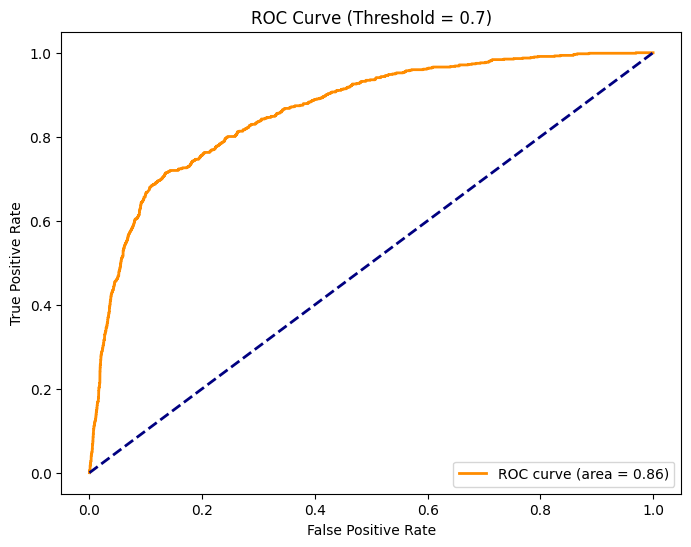


Threshold: 0.7
AUC-ROC Score: 0.8615653778209832
Confusion Matrix:
[[5789    9]
 [ 777   15]]
Classification Report:
              precision    recall  f1-score   support

          No       0.88      1.00      0.94      5798
         Yes       0.62      0.02      0.04       792

    accuracy                           0.88      6590
   macro avg       0.75      0.51      0.49      6590
weighted avg       0.85      0.88      0.83      6590



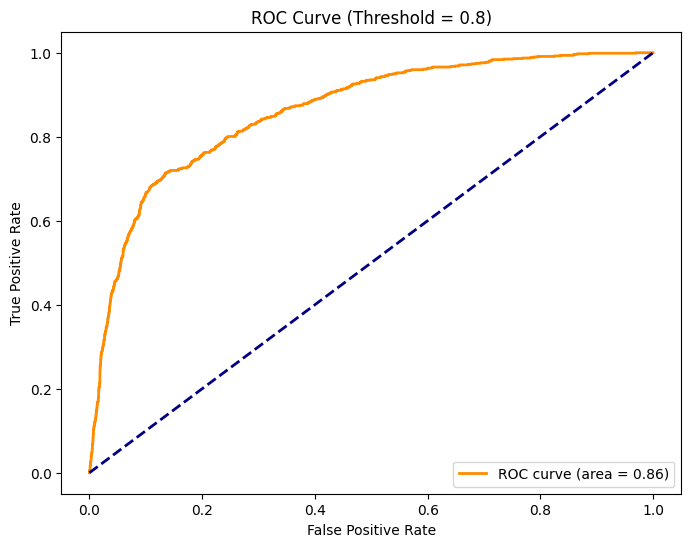


Threshold: 0.8
AUC-ROC Score: 0.8615653778209832
Confusion Matrix:
[[5798    0]
 [ 792    0]]
Classification Report:
              precision    recall  f1-score   support

          No       0.88      1.00      0.94      5798
         Yes       0.00      0.00      0.00       792

    accuracy                           0.88      6590
   macro avg       0.44      0.50      0.47      6590
weighted avg       0.77      0.88      0.82      6590



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
y_prob = model.predict(X_test)

# Create an array of threshold values to try
thresholds = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

# Loop through threshold values
for threshold in thresholds:
    # Convert probabilities to binary predictions based on threshold
    y_pred = (y_prob > threshold).astype('int32')

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)

    # Calculate AUC-ROC
    auc_score = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(auc_score))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve (Threshold = {threshold})')
    plt.legend(loc='lower right')
    plt.show()

    # Print AUC-ROC score
    print(f"\nThreshold: {threshold}")
    print(f"AUC-ROC Score: {auc_score}")
    print(f"Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print(f"Classification Report:")
    print(classification_report(y_test, y_pred, target_names=['No', 'Yes']))


In [ ]:
import numpy as np
from sklearn.metrics import recall_score, confusion_matrix

# Get predicted probabilities for the positive class
y_prob = model.predict(X_test)

# Create an array of threshold values to try
thresholds = np.linspace(0, 1, 100)

# Initialize variables to store optimal values
optimal_threshold = 0
max_j_statistic = -1
best_confusion_matrix = None

# Loop through threshold values
for threshold in thresholds:
    # Convert probabilities to binary predictions based on threshold
    y_pred = (y_prob > threshold).astype('int32')

    # Calculate sensitivity and specificity
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    sensitivity = recall_score(y_test, y_pred)
    specificity = tn / (tn + fp)

    # Calculate Youden's J statistic
    j_statistic = sensitivity + specificity - 1

    # Update optimal values if a higher J statistic is found
    if j_statistic > max_j_statistic:
        max_j_statistic = j_statistic
        optimal_threshold = threshold
        best_confusion_matrix = confusion_matrix(y_test, y_pred)


# Print optimal threshold and maximum J statistic
print(f"Optimal Threshold: {optimal_threshold}")
print(f"Maximum Youden's J Statistic: {max_j_statistic}")

# Print the confusion matrix for the optimal threshold
print("Confusion Matrix:")
print(best_confusion_matrix)

# Evaluate the model on the test set using the optimal threshold
y_pred = (y_prob > optimal_threshold).astype('int32')
# Print classification report with label names
class_report = classification_report(y_test, y_pred, target_names=['No', 'Yes'])
print("\nClassification Report:")
print(class_report)



206/206 [==============================] - 1s 2ms/step
Optimal Threshold: 0.13131313131313133
Maximum Youden's J Statistic: 0.5724148173699743
Confusion Matrix:
[[5171  627]
 [ 253  539]]

Classification Report:
              precision    recall  f1-score   support

          No       0.95      0.89      0.92      5798
         Yes       0.46      0.68      0.55       792

    accuracy                           0.87      6590
   macro avg       0.71      0.79      0.74      6590
weighted avg       0.89      0.87      0.88      6590

